<a href="https://colab.research.google.com/github/mohammad-nahid-hossain/MSc.-Projects/blob/main/My_CI_Project_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"

 2014_Bodily_Maps_of_Emotions.mat
'2019110211_Hossain Mohammad Nahid.gdoc'
 Books
'Books(islamic)'
'Bsc Thesis'
 CERTIFICATES
'Colab Notebooks'
 Coursera
 CV
'Data Acquisition for research work'
 DeepLearningBook.pdf
'Dream forest tour'
'Getting started.pdf'
'GME transaction'
 Hmmmmm.gsheet
'How to install cuda 10.1 in Ubuntu 18.04.zip'
 IMG_4717.JPG
 IMG_4719.JPG
 lecture_1.pdf
 lecture_2.pdf
 lecture_3.pdf
 lecture_4.pdf
 Msc
 Neural-Network-based-finger-counting-technique.pdf
'New Doc 2019-09-03 20.05.57.jpg'
 Paper
'PhD Application'
'PhD Application Pack'
'Planning Document.docx'
'Planning Document.odt'
'Planning Document.pdf'
'Snow fall video'
'Untitled Diagram.drawio'


In [ ]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# read the train and test dataset
train_data = pd.read_csv('/content/drive/My Drive/Msc/Msc Thesis/Coding Documents/WFS/GMB/CI_detection_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Msc/Msc Thesis/Coding Documents/WFS/GMB/CI_detection_test.csv')
data = pd.read_csv('/content/drive/My Drive/Msc/Msc Thesis/Coding Documents/WFS/GMB/CI_data.csv')

In [ ]:
dd = data.describe()

In [ ]:
dd

,TotalTime,EC,AVG,Energy,Sleep,Step,HeartData,Group
count,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000
mean,11.345753,1.475616,1.646248,460.570594,6.978082,760.218082,75.810594,0.483836
std,3.248970,1.126255,0.510702,230.983790,1.656983,127.193071,10.668028,0.845729
min,4.000000,0.000000,0.500000,173.333333,3.000000,520.000000,52.000000,0.000000
25%,9.000000,0.000000,1.285714,275.333333,6.000000,660.000000,68.000000,0.000000
50%,11.000000,1.000000,1.571429,372.000000,7.000000,759.000000,76.000000,0.000000
75%,13.000000,2.000000,2.000000,660.000000,8.000000,845.000000,84.000000,1.000000
max,19.000000,3.000000,3.166667,1050.000000,9.000000,1050.000000,100.000000,3.000000


In [ ]:
from scipy.io import savemat
savemat('/content/drive/My Drive/Msc/Msc Thesis/Coding Documents/WFS/GMB/CI_data.mat', {'CI_data': dd })

In [ ]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (3998, 8)
Shape of testing data : (1476, 8)


In [ ]:
# seperate the independent and target variable on training data
X_train = train_data.drop(columns=['Group'],axis=1)
y_train = train_data['Group']

In [ ]:
# seperate the independent and target variable on testing data
X_test = test_data.drop(columns=['Group'],axis=1)
y_test = test_data['Group']

In [ ]:
#Create the object of the GradientBoosting Classifier model
#You can also add other parameters and test your code here
#Some parameters are : learning_rate, n_estimators
#Documentation of sklearn GradientBoosting Classifier: 

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model = GradientBoostingClassifier(n_estimators=32,max_depth=6)

In [ ]:
# fit the model with the training data
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=32,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


Target on train data [3 3 3 ... 0 0 0]


In [ ]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9432216108054027


In [ ]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 


Target on test data [3 3 3 ... 0 0 0]


In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.907859078590786


In [ ]:
import scipy.io
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=3)
roc_auc = metrics.auc(fpr, tpr)
print('Class 3 fpr: ', fpr)
print('\nClass 3 tpr: ', tpr)
print('\nClass 3 roc_auc: ', roc_auc)


fpr_3 = fpr
tpr_3 = tpr

Class 3 fpr:  [0.00000000e+00 7.02247191e-04 1.40449438e-03 2.80898876e-03
 5.61797753e-03 1.05337079e-02 1.19382022e-02 1.47471910e-02
 1.68539326e-02 1.82584270e-02 2.31741573e-02 2.59831461e-02
 2.66853933e-02 2.80898876e-02 3.30056180e-02 3.72191011e-02
 4.00280899e-02 4.14325843e-02 4.35393258e-02 4.49438202e-02
 4.56460674e-02 4.70505618e-02 4.98595506e-02 5.19662921e-02
 5.33707865e-02 5.75842697e-02 5.96910112e-02 6.10955056e-02
 6.17977528e-02 6.32022472e-02 6.39044944e-02 6.53089888e-02
 6.60112360e-02 6.81179775e-02 6.95224719e-02 7.02247191e-02
 7.86516854e-02 8.07584270e-02 8.14606742e-02 8.28651685e-02
 9.83146067e-02 1.00421348e-01 1.01825843e-01 1.02528090e-01
 1.03932584e-01 1.04634831e-01 1.06039326e-01 1.08146067e-01
 1.10252809e-01 1.13061798e-01 1.15168539e-01 1.16573034e-01
 1.18679775e-01 1.22893258e-01 1.25702247e-01 1.27106742e-01
 1.27808989e-01 1.32724719e-01 1.39747191e-01 1.41853933e-01
 1.43960674e-01 1.45365169e-01 1.46769663e-01 1.49578652e-01
 1.5098314

Text(0.5, 0, 'False Positive Rate')

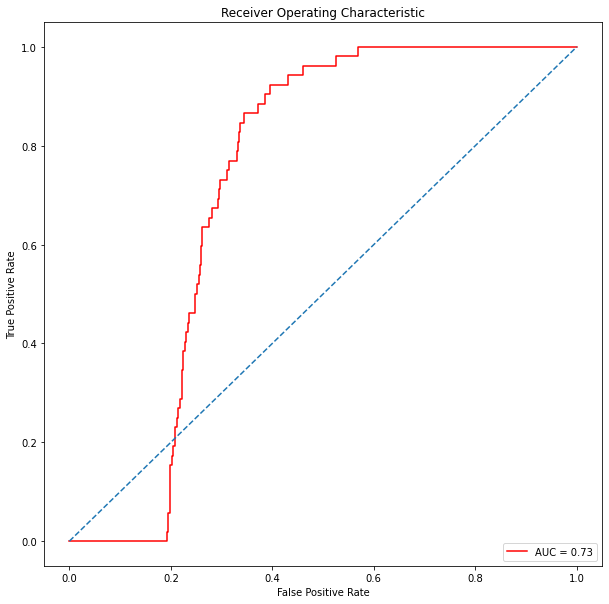

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
y_train.shape

(3998,)

In [ ]:
y_test.shape

(1476,)

In [ ]:
y = pd.concat([y_train, y_test])
y.shape

(5474,)

In [ ]:
# fit the model with the training data
y_score = model.fit(X_train,y_train)

In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds, pos_label= n_classes)
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


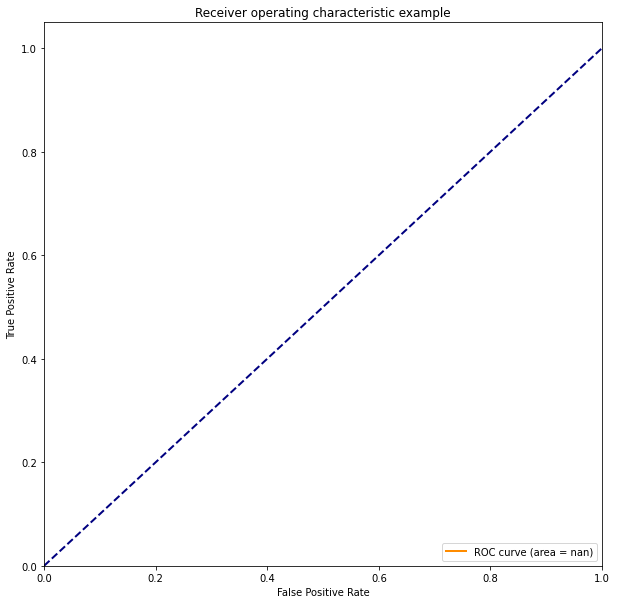

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


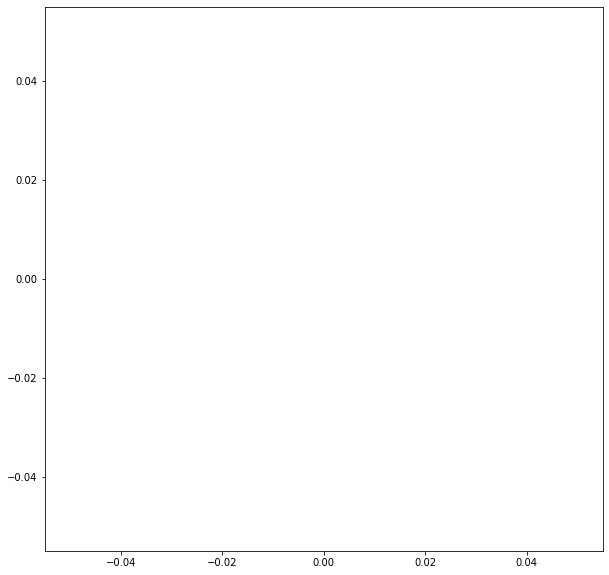

In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import numpy.interp
from itertools import cycle
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
#plt.plot(fpr["micro"], tpr["micro"],
 #        label='micro-average ROC curve (area = {0:0.2f})'
  #             ''.format(roc_auc["micro"]),
   #       color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'blue', 'yellow', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
#predict_test = model.predict(X_test)
preds = model.predict_proba(X_test)[:,1]
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

fpr_2 = fpr
tpr_2 = tpr

Text(0.5, 0, 'False Positive Rate')

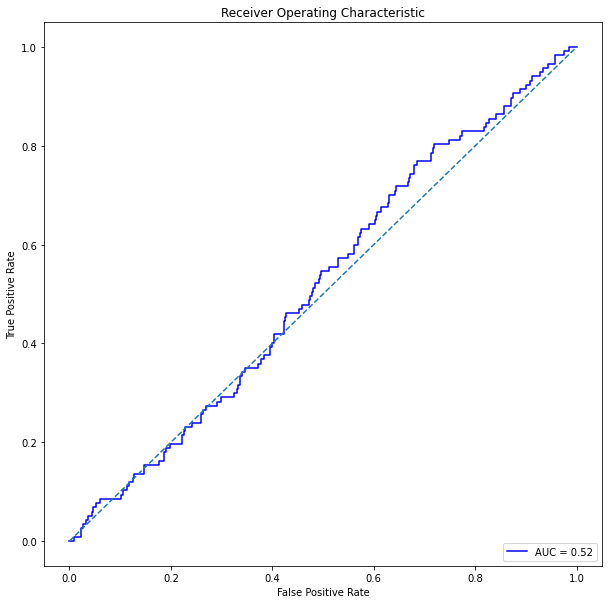

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='blue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
#predict_test = model.predict(X_test)
preds = model.predict_proba(X_test)[:,1]
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

fpr_1 = fpr
tpr_1 = tpr

Text(0.5, 0, 'False Positive Rate')

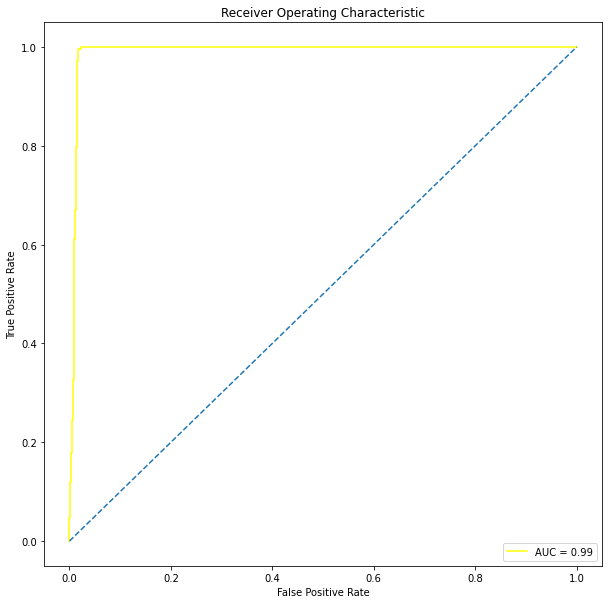

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='yellow',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
#preds = probs[:,1]
#predict_test = model.predict(X_test)
preds = model.predict_proba(X_test)[:,1]
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.11449381409643031

Text(0.5, 0, 'False Positive Rate')

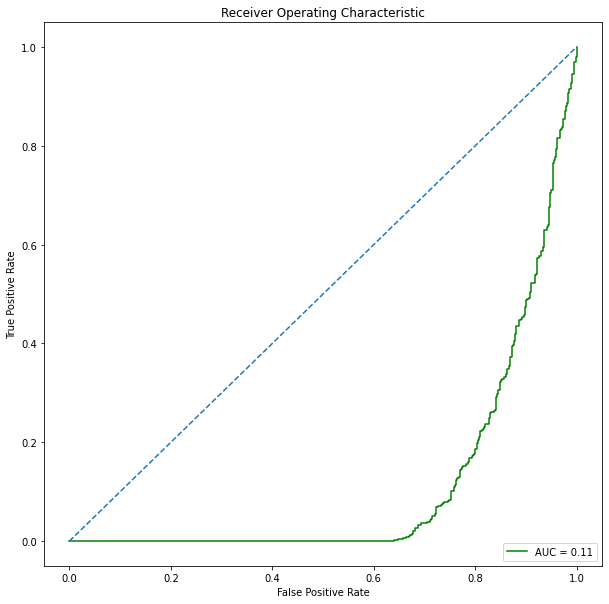

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='green',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix=metrics.confusion_matrix(y_test,predict_test)
print("Confusion Matrix: ",confusion_matrix)

Confusion Matrix:  [[1042    1   12    0]
 [   0  249    3    0]
 [  91   19    2    5]
 [   0    0    3   49]]


In [ ]:
from sklearn.metrics import classification_report
print("Report : ", classification_report(y_test, predict_test)) 

Report :                precision    recall  f1-score   support

           0       0.92      0.99      0.95      1055
           1       0.93      0.99      0.96       252
           2       0.10      0.02      0.03       117
           3       0.91      0.94      0.92        52

    accuracy                           0.91      1476
   macro avg       0.71      0.73      0.72      1476
weighted avg       0.86      0.91      0.88      1476



In [ ]:
from scipy.io import savemat
savemat('/content/drive/My Drive/Msc/Msc Thesis/Coding Documents/WFS/GMB/roc_data.mat', {'fpr_1': fpr_1, 'tpr_1' : tpr_1,'fpr_2': fpr_2, 'tpr_2' : tpr_2,'fpr_3': fpr_3, 'tpr_3' : tpr_3})